<div style="text-align: center;">
  <h1>📚 Importing Required Libraries</h1>
</div>

 **Pandas, NumPy** (Dataset Acquisition , Data Exploration and Preprocessing)  
 
 **Matplotlib, Seaborn** (Data Visualization, Model Interpretation)   
 
 **Scikit-Learn** (Data Splitting,Model Selection,Model Training,Model Evaluation, Model Interpretation) 
 
**Tensorflow** (Machine learning and deep learning Framework,Data preprocessing,Model building,Model training and Evaluation)

 **Keras** (High-level neural networks API ,Works on top of TensorFlow)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



<div style="text-align: center;">
  <h1>🛠️Data Preprocessing </h1>
</div>


### 1. Import and Check the Data

In [2]:

saledata = pd.read_csv("sale.csv")


In [3]:
rows, columns = saledata.shape

print(f"Number of Rows: {rows}")
print(f"Number of Columns: {columns}")

Number of Rows: 500
Number of Columns: 9


In [4]:
saledata.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
print(saledata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB
None


In [6]:
saledata.isnull()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [7]:
saledata.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool


### 2.🧹Data Cleaning
​
Country column can also be drop i did not drop because if you want i did not drop becuase i want to apply data transformation to gain my knowlege but during prediction i will not use

***🗑️ Drop Unnecessary Columns***

In [8]:
drop_col = saledata.drop(["customer name","customer e-mail"],axis=1)

In [9]:
drop_col.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


***🔄 Data Transformation***

Here we have 2 options:-
1. We can use Label Encoding here and directly convert those values into 0,1,2 like that
2. We can use One Hot Encoding here which will convert those strings into a binary vector stream. For example – Cook Islands	 will be encoded as 001, Brazil	 will be 010, etc.
The first approach is easy and faster to implement. However, once those values are encoded, those will be converted into 0,1,2.

Encoding Categorical Variable Country
This column has a cardinality of 3 meaning that it has 4 distinct categories present i.e Bulgaria , Belize, Algeri, Cook Islands ,  Brazil  .

In [10]:


# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the label encoder to the "country" column and transform it
saledata['country_encoded'] = label_encoder.fit_transform(saledata['country'])

# Display the transformed column
print(saledata[['country', 'country_encoded']].head())

# Drop the original "country" column if you no longer need it
saledata.drop('country', axis=1, inplace=True)


        country  country_encoded
0      Bulgaria               28
1        Belize               18
2       Algeria                2
3  Cook Islands               42
4        Brazil               27


In [11]:
saledata.head()

,customer name,customer e-mail,gender,age,annual Salary,credit card debt,net worth,car purchase amount,country_encoded
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,28
1,Harlan Barnes,eu.dolor@diam.co.uk,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,18
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,2
3,Jade Cunningham,malesuada@dignissim.com,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,42
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,27


In [12]:
# Reorder the columns with "car purchase amount" as the last column
saledata = saledata[['age', 'annual Salary', 'credit card debt', 'net worth', 'country_encoded', 'gender', 'car purchase amount']]
saledata.head()


,age,annual Salary,credit card debt,net worth,country_encoded,gender,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,28,0,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,18,0,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,2,1,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,42,1,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,27,1,55915.46248


### 3. 🔍 Data Exploration

***📈Summary Statistics***

In [13]:
saledata.describe()

,age,annual Salary,credit card debt,net worth,country_encoded,gender,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.241674,62127.239608,9607.645049,431475.713625,102.416000,0.506000,44209.799218
std,7.978862,11703.378228,3489.187973,173536.756340,60.336755,0.500465,10773.178744
min,20.000000,20000.000000,100.000000,20000.000000,0.000000,0.000000,9000.000000
25%,40.949969,54391.977195,7397.515792,299824.195900,51.000000,0.000000,37629.896040
50%,46.049901,62915.497035,9655.035568,426750.120650,99.500000,1.000000,43997.783390
75%,51.612263,70117.862005,11798.867487,557324.478725,155.250000,1.000000,51254.709517
max,70.000000,100000.000000,20000.000000,1000000.000000,210.000000,1.000000,80000.000000


### 4. 📈 Data Visualization

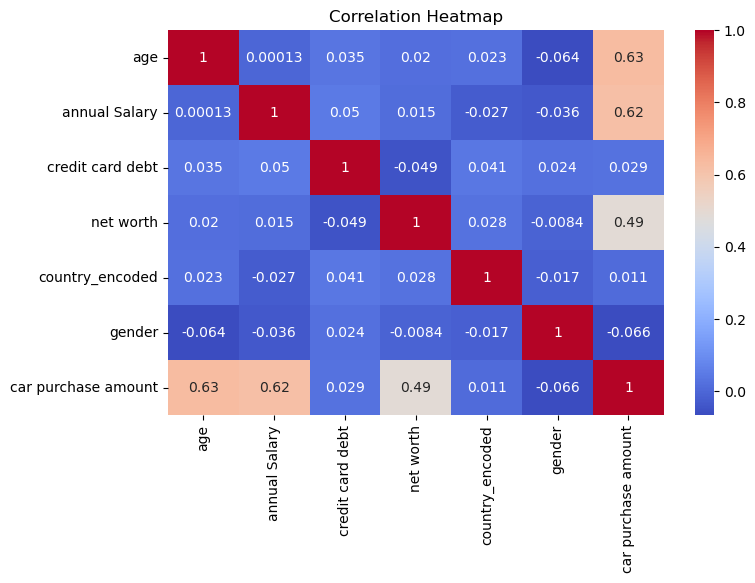

In [14]:
# Correlation Heatmap to visualize feature correlations
correlation_matrix = saledata.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

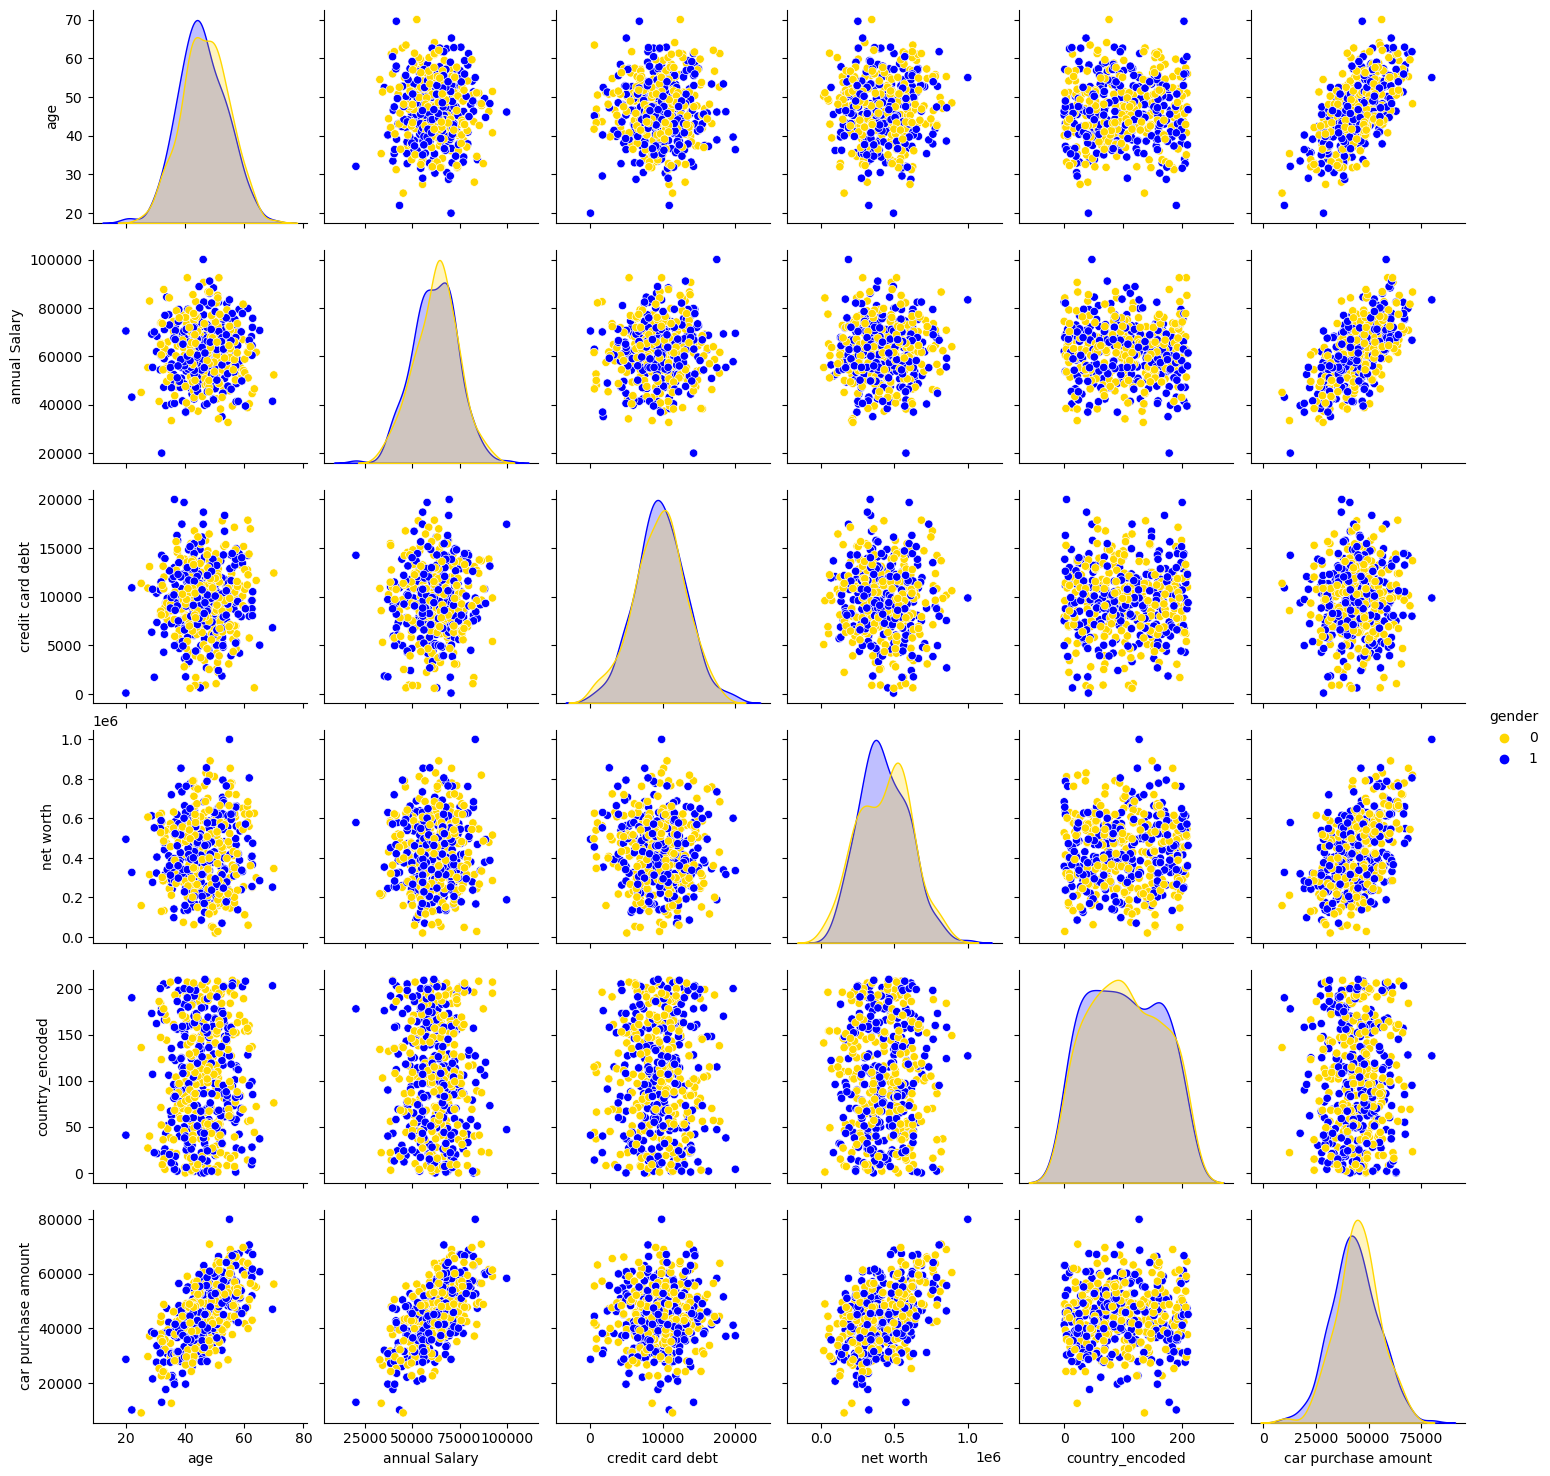

In [15]:

custom_palette = {1: "blue", 0: "gold"}


sns.pairplot(saledata, hue="gender", palette=custom_palette)
plt.show()

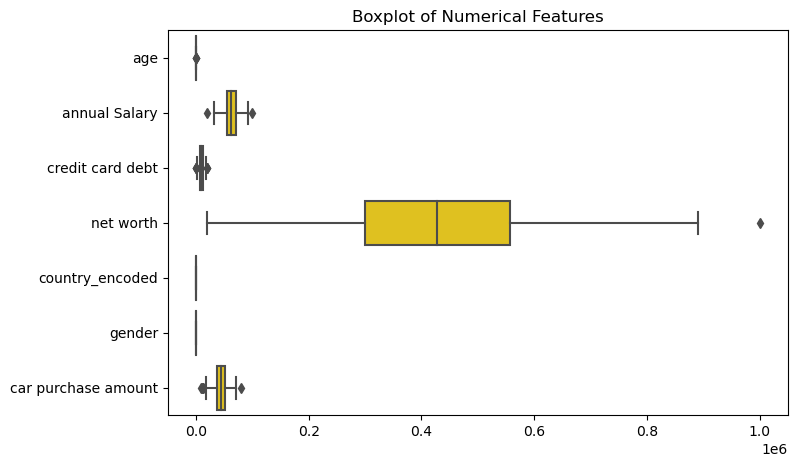

In [16]:
# Boxplot to visualize the distribution of numerical features
plt.figure(figsize=(8, 5))
sns.boxplot(data=saledata, orient="h",color='gold')
plt.title("Boxplot of Numerical Features")
plt.show()

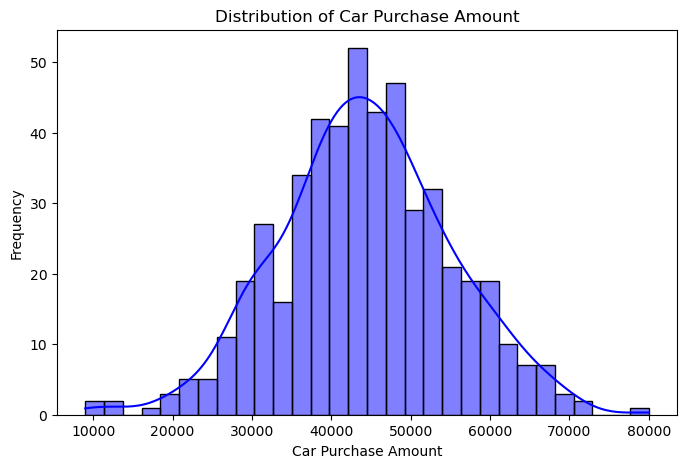

In [17]:
# Distribution of the target variable "car purchase amount" with custom colors
plt.figure(figsize=(8, 5))
sns.histplot(saledata["car purchase amount"], bins=30, kde=True, color='blue')
plt.title("Distribution of Car Purchase Amount")
plt.xlabel("Car Purchase Amount")
plt.ylabel("Frequency")
plt.show()


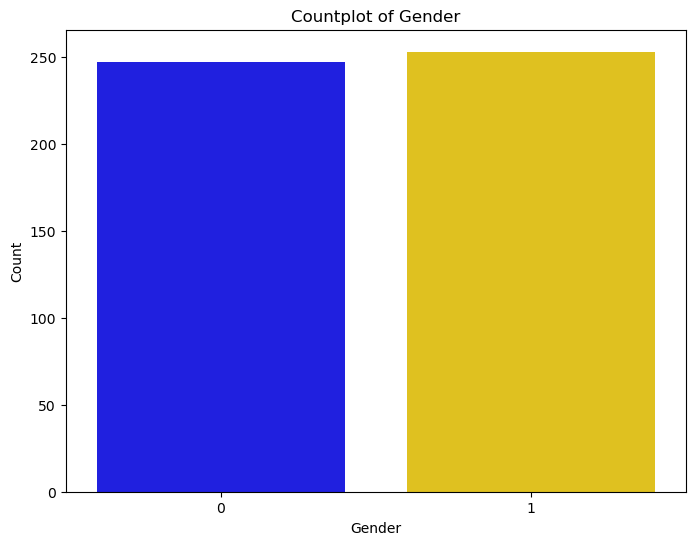

In [18]:
# Countplot for the "gender" variable with custom colors for gender 0 and 1
plt.figure(figsize=(8, 6))
custom_palette = {0: "blue", 1: "gold"}  # Define custom colors for gender 0 and 1
sns.countplot(data=saledata, x="gender", palette=custom_palette)
plt.title("Countplot of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


### 5. Generating Dependent and In-Dependent Variable


In [19]:


# Extract the dependent variable (Y)
Y = saledata.iloc[:, -1]  # Select all rows and the last column

# Extract the independent variables (X), excluding the last column (car purchase amount)
X = saledata.iloc[:, :-1] 



### 6. Split the Dataset for Test and Train
In this step, we split our dataset into a test set and train set and an 80% dataset split for training and the remaining 20% for tests.

In [20]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

### 7. Performing Feature Scaling
The very last step in our data preprocessing phase is feature scaling. It is a procedure where all the variables are converted into the same scale.. If we perform feature scaling before the train-test split then it will cause information leakage on testing datasets which neglects the purpose of having a testing dataset and hence we should always perform feature scaling after the train-test split.The two most efficient techniques in the context are:-

1. Standardization

2. Normalization

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

# Fit and transform the scaler on training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)



<div style="text-align: center;">
  <h2>🛠️ Model Building</h2>
</div>

### ANN
Artificial Neural Network (ANN) with an input layer of 6 features, two hidden layers with ReLU activation, and an output layer for regression using the mean squared error loss.
Compiling an Artificial Neural Network (ANN) model using the Keras library, which is built on top of TensorFlow.and predicts a numeric output using a linear activation function. The model is then compiled with the specified optimizer and loss function.



In [22]:

# Initialize the model
model = keras.Sequential()


# Input layer (6 features)
model.add(layers.Input(shape=(6,)))

# Hidden layer
model.add(layers.Dense(units=32, activation='relu', input_dim=6))
model.add(layers.Dense(units=32, activation='relu', input_dim=6))
model.add(layers.Dense(units=1, activation='linear'))  # output layer

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1313 (5.13 KB)
Trainable params: 1313 (5.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [25]:
history = model.fit(X_train,Y_train,epochs=100,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 51ms/step - loss: 2028900608.0000 - val_loss: 2161076224.0000
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 2028876416.0000 - val_loss: 2161050368.0000
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 2028852608.0000 - val_loss: 2161024512.0000
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 2028826880.0000 - val_loss: 2160997888.0000
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 2028800256.0000 - val_loss: 2160968192.0000
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 2028769920.0000 - val_loss: 2160935424.0000
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 2028735488.0000 - val_loss: 2160898560.0000
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 2028696320.0000 - val_loss: 2160855808.0000
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 2028651

Loss vs. Epochs Plot:
This plot helps you visualize how the loss (typically mean squared error for regression tasks) changes over training epochs.

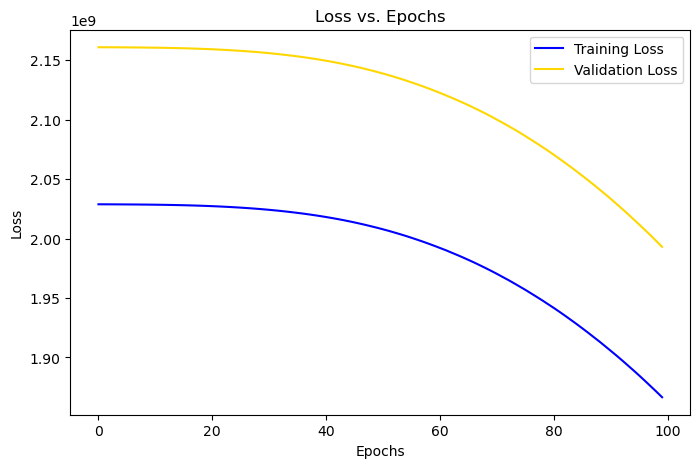

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss' , color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss' , color='gold')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


<div style="text-align: center;">
  <h2>🎯 Generating Predictions</h2>
</div>

##### Predicting Car Purchase Amount for Random Samples


In [27]:
# For 1 sample
X_random_sample = np.array([[41, 62812, 562341, 238961, 0, 1]]) 

y_predict = model.predict(X_random_sample)

print('Predicted Car Purchase Amount is =', y_predict[0][0])


1/1 [==============================] - 0s 152ms/step
Predicted Car Purchase Amount is = 371780600.0


In [28]:
# For 10 sample
random_samples = {
    'age': [32, 45, 28, 38, 50, 42, 35, 55, 48, 30],
    'annual Salary': [72000, 82000, 55000, 95000, 110000, 75000, 63000, 98000, 105000, 68000],
    'credit card debt': [3000, 10000, 2000, 8000, 15000, 5000, 3000, 12000, 17000, 4000],
    'net worth': [40000, 60000, 35000, 75000, 90000, 55000, 42000, 80000, 95000, 38000],
    'country_encoded': [2, 1, 0, 3, 4, 2, 1, 3, 4, 0],  # Adjust these values based on your label encoding
    'gender_encoded': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # Assuming '0' corresponds to 'Male' and '1' to 'Female'
}

random_df = pd.DataFrame(random_samples)

scaler = StandardScaler()  

scaler.fit(X_train)

X_random_samples = scaler.transform(random_df)

predicted_amounts = model.predict(X_random_samples)

random_df['Predicted_Car_Purchase_Amount'] = predicted_amounts
print(random_df)


1/1 [==============================] - ETA: 0s

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
   age  annual Salary  credit card debt  net worth  country_encoded  \
0   32          72000              3000      40000                2   
1   45          82000             10000      60000                1   
2   28          55000              2000      35000                0   
3   38          95000              8000      75000                3   
4   50         110000             15000      90000                4   
5   42          75000              5000      55000                2   
6   35          63000              3000      42000                1   
7   55          98000             12000      80000                3   
8   48         105000             17000      95000                4   
9   30          68000              4000      38000                0   

   gender_encoded  Predicted_Car_Purchase_Amount  
0               1                     56303040.0  
1               0                     72611456.0  
2           

Remember that the warning is informative and doesn't necessarily indicate an issue with your code. Your choice of how to handle it depends on your preference and whether you want to keep feature names in your data.

In [29]:
random_df

,age,annual Salary,credit card debt,net worth,country_encoded,gender_encoded,Predicted_Car_Purchase_Amount
0,32,72000,3000,40000,2,1,56303040.0
1,45,82000,10000,60000,1,0,72611456.0
2,28,55000,2000,35000,0,1,45140800.0
3,38,95000,8000,75000,3,0,86747984.0
4,50,110000,15000,90000,4,1,102977056.0
5,42,75000,5000,55000,2,0,65874448.0
6,35,63000,3000,42000,1,1,52832808.0
7,55,98000,12000,80000,3,0,91478984.0
8,48,105000,17000,95000,4,1,103926816.0
9,30,68000,4000,38000,0,0,53500452.0
